In [124]:
import numpy as np
import matplotlib.pyplot as plt

import os
from PIL import Image
import PIL.ImageOps    

from skimage.morphology import skeletonize
from skimage import data
import skimage.util
from skimage.color import rgb2gray
from skimage.filters import roberts
from skimage.filters import threshold_otsu


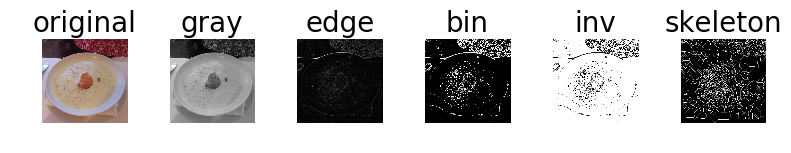

In [133]:
arraydirectory= './edge_array/'
photodirectory='./photos/'

# Invert the image
image=np.array(Image.open(photodirectory + '4505.jpg'))
img_gray = rgb2gray(image)
img_edge=roberts(img_gray)
thresh = threshold_otsu(img_edge)
img_bin = img_edge > thresh
img_inv=abs(np.add(img_bin,-1))
#image_clean=skimage.morphology.remove_small_objects(image_inv,connectivity=3)
# perform skeletonization
skeleton = skeletonize(img_inv)

# display results
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(8, 4),
                         sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(img_gray, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('gray', fontsize=20)

ax[2].imshow(img_edge, cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title('edge', fontsize=20)

ax[3].imshow(img_bin, cmap=plt.cm.gray)
ax[3].axis('off')
ax[3].set_title('bin', fontsize=20)

ax[4].imshow(img_inv, cmap=plt.cm.gray)
ax[4].axis('off')
ax[4].set_title('inv', fontsize=20)

ax[5].imshow(skeleton, cmap=plt.cm.gray)
ax[5].axis('off')
ax[5].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

Binarization of the edge operator (Roberts) seems more usefull than the inverse transformation with consecutive Skeletonize.

In [128]:
arraydirectory= './array_skeleton/'
photodirectory='./photos/'

if not os.path.exists(arraydirectory):
    os.makedirs(arraydirectory)
    
for fn in os.listdir(photodirectory):
    if os.path.isfile(photodirectory + fn) and '.jpg' in fn:
        img=np.array(Image.open(photodirectory + fn))
        img_gray = rgb2gray(img)
        img_edge=roberts(img_gray)
        thresh = threshold_otsu(img_edge)
        img_bin = img_edge > thresh
        img_inv=abs(np.add(img_bin,-1))
        # perform skeletonization
        skeleton = skeletonize(img_inv)
        skeleton_flat=[item for sublist in skeleton for item in sublist]
        np.save(arraydirectory + fn,skeleton_flat)